# Graded Challenge 1 (Phase 1)


# I. Perkenalan

- Nama  : Ida Ayu Gede Ima Dewi Pertami
- Batch : HCK-004

Problems Statement:
- Membuat model Regression menggunakan Linear Regression untuk memprediksi harga perjalanan platform ride-hailing

Objective :
- Untuk membantu platform ride-hailing dalam menentukan harga yang tepat untuk setiap perjalanan.

Penjabaran masalah :
- Membuat model regresi untuk memprediksi harga perjalanan pada platform ride-hailing menggunakan metode linear regression. Model ini akan digunakan untuk memperkirakan biaya perjalanan pelanggan dan membantu platform ride-hailing dalam menentukan harga yang tepat untuk setiap perjalanan. Dalam konteks ini, variabel bebas (fitur) yang digunakan untuk memprediksi variabel terikat (target) adalah variabel-variabel yang berkaitan dengan perjalanan, seperti jarak tempuh, jenis kendaraan yang dipilih, waktu tempuh, lokasi awal, dan lokasi tujuan, . Dengan menggunakan model regresi ini, diharapkan dapat membantu platform ride-hailing dalam meningkatkan pengalaman pelanggan dan meningkatkan keuntungan.

# II. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from feature_engine.outliers import Winsorizer

# Model
from sklearn.linear_model import LinearRegression

# Evaluasi
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Save model
import joblib
import json

import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor

# III. Data Loading

In [2]:
# Load dataset dan cek missing value non standard
missing_values = ["n/a", "na", "--", "none", "?", "-"]
df = pd.read_csv('../GC1P1/rideshare_kaggle.csv', na_values = missing_values)

- Missing value pada dataset diganti menjadi nan value

In [3]:
# Melihat berapa jumlah kolom dan baris
df.shape

(693071, 57)

In [4]:
# Mencari data duplikasi
df[df.duplicated()].shape

(0, 57)

- Tidak terdapat adanya data duplikasi 

In [5]:
# Menampilkan dataset teratas
pd.set_option("display.max.columns",None)
df.head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600


In [6]:
# Memeriksa informasi dasar
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [7]:
# Mengubah dtype pada datetime
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  object        
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  object        
 7   source                       693071 non-null  object        
 8   destination                  693071 non-null  object        
 9   cab_type                     693071 non-null  object        
 10  product_id                   693071 non-null  object        
 11  name                      

- Mengubah informasi dtype pada datetime dari object menjadi datetime64[ns]

In [9]:
# Mencari missing value
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

- Missing value terdapat di pada kolom price (55095)

In [10]:
# Mencari letak missing value pada price
df.loc[df['price'].isnull()].head(2)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.91,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.91,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.79,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.79,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000


In [11]:
# Mengelompokan kolom name dengan kolom price untuk dihitung jumlah datanya
df.groupby('name')[['price']].count()

,price
name,
Black,55095
Black SUV,55096
Lux,51235
Lux Black,51235
Lux Black XL,51235
Lyft,51235
Lyft XL,51235
Shared,51233
Taxi,0


Berdasarkan data di atas dapat disimpulkan bahwa :
- Missing value berada di kolom price
- Missing value terdapat pada kolom name pada data taxi, kemungkinan data price pada taxi tidak dilakukan pencatatan sehingga mengakibatkan nilainya kosong

In [12]:
# Menghapus baris pada price yang terdapat missing value
df.dropna(subset=['price'], inplace=True)

In [13]:
(df.isnull().values.sum())

0

- Missing values pada price sudah dihandling dengan menghapus baris yang memiliki nilai yang hilang (NaN/null) pada kolom price

# IV. Exploratory Data Analysis (EDA)

In [14]:
# Mengelompokan cab_type dengan price
df.groupby('cab_type')[['price']].aggregate(['mean','count'])

price        
               mean   count
cab_type                   
Lyft      17.351396  307408
Uber      15.795343  330568

- Informasi yang didapat dari data di atas yaitu rata harga Lyft lebih tinggi dari Uber. 
- Jumlah orang yang memakai Lyft lebih banyak dari Uber 

In [15]:
# Mencari informasi datetime
df.datetime.describe()

count                  637976
unique                  31350
top       2018-11-26 23:33:14
freq                      151
first     2018-11-26 03:40:46
last      2018-12-18 19:15:10
Name: datetime, dtype: object

- Data diambil dari 26 November 2018 - 18 Desember 2018

In [16]:
# Mengelompokan cab_type dengan name berdasarkan rata" pricenya
df.groupby(['cab_type', 'name'])[['price']].mean()

price
cab_type name                   
Lyft     Lux           17.771240
         Lux Black     23.062468
         Lux Black XL  32.324086
         Lyft           9.610885
         Lyft XL       15.309363
         Shared         6.029893
Uber     Black         20.523786
         Black SUV     30.286763
         UberPool       8.752500
         UberX          9.765074
         UberXL        15.678144
         WAV            9.765019

Berdasarkan data diatas dapat dilihat bahwa:
- Cab_type terbagi menjadi dua kategori yaitu lyft dan Uber
- Pada kategori Lyft price dengan rata" tertinggi terdapat pada jenis Lux Black XL yaitu seharga 32.324086
- Pada kategori Uber price dengan rata" tertinggi terdapat pada jenis Black SUV	 yaitu seharga 30.286763

In [17]:
df.groupby(['cab_type', 'name'])[['distance']].aggregate(['mean', 'min','max'])

distance            
                           mean   min   max
cab_type name                              
Lyft     Lux           2.186968  0.39  6.33
         Lux Black     2.186968  0.39  6.33
         Lux Black XL  2.186968  0.39  6.33
         Lyft          2.186968  0.39  6.33
         Lyft XL       2.186968  0.39  6.33
         Shared        2.187012  0.39  6.33
Uber     Black         2.191399  0.02  7.86
         Black SUV     2.191378  0.02  7.86
         UberPool      2.191396  0.02  7.86
         UberX         2.191390  0.02  7.86
         UberXL        2.191378  0.02  7.86
         WAV           2.191378  0.02  7.86

- Jarak tempuh paling jauh 7,86 km pada Uber dan 6,33 km pada Lyft, dengan rata" jarak tempuh 2,18 km dan 2,19 km

In [18]:
df.groupby(['source', 'destination'])[['price']].mean().sort_values(by = 'price', ascending=False)

,,price
source,destination,
Financial District,Boston University,25.498434
Boston University,Financial District,24.146085
Fenway,Financial District,23.438818
Financial District,Fenway,23.404850
Northeastern University,Financial District,22.582094
...,...,...
North Station,Haymarket Square,12.571791
Haymarket Square,West End,12.529855
South Station,Financial District,12.436910


- Untuk tujuan Financial District - Boston University memiliki rata" harga tertinggi dari yang lainnya yaitu sebesar 25.498434

In [19]:
df.surge_multiplier.value_counts()

1.00    617001
1.25     11085
1.50      5065
1.75      2420
2.00      2239
2.50       154
3.00        12
Name: surge_multiplier, dtype: int64

- Biaya perjalanan untuk transportasi online pelanggan paling banyak dikalikan dengan jumlah pengalinya satu
- Surge_multiplier adalah biaya perjalanan yang akan dikalikan berlipat sesusai dengan jumlah pengalinya dikarenakan di beberapa daerah tertentu perusahaan kesulitan untuk memenuhi jumlah permintaan layanan  dari masyarakat. 

In [20]:
df.groupby(['surge_multiplier'])[['price']].mean()

,price
surge_multiplier,
1.00,16.161259
1.25,23.768471
1.50,28.894472
1.75,33.673760
2.00,39.048459
2.50,30.207792
3.00,40.333333


- Rentangan surge_multiplier dari 1-3 dengan rata-rata harga dari 16.161259 - 40.333333

In [21]:
df.groupby(['cab_type','short_summary'])[['price']].mean().sort_values('price',ascending=True)

price
cab_type short_summary                
Uber      Foggy              15.640326
          Clear              15.717256
          Partly Cloudy      15.773583
          Drizzle            15.774903
          Overcast           15.798112
          Possible Drizzle   15.808930
          Rain               15.828894
          Light Rain         15.841686
          Mostly Cloudy      15.842580
Lyft      Possible Drizzle   17.239823
          Rain               17.312022
          Clear              17.314370
          Overcast           17.322030
          Light Rain         17.335067
          Drizzle            17.346191
          Partly Cloudy      17.384013
          Mostly Cloudy      17.406237
          Foggy              17.506247

- Dapat dilihat pada tabel di atas bahwa cuaca tidak mempengaruhi kenaikan tarif kendaran online tersebut

In [22]:
df.groupby(['cab_type'])[['hour']].value_counts()

cab_type  hour
Lyft      0       14657
          23      14004
          17      13853
          12      13633
          13      13503
          18      13404
          15      13394
          11      13372
          16      13349
          10      13325
          14      13306
          22      13247
          9       12948
          1       12669
          2       12548
          4       12502
          21      12480
          19      12461
          3       12224
          6       11935
          20      11715
          5       11155
          7       11024
          8       10700
Uber      23      15351
          0       15215
          14      14670
          16      14623
          10      14593
          11      14574
          18      14554
          15      14474
          13      14474
          12      14384
          17      14222
          22      13846
          2       13775
          9       13725
          1       13641
          4       13623
          3       13306
 

- Pemesanan Lyft dan Uber paling banyak dipesan pada pkl. 23.00 dan 24.00

In [68]:
df.groupby(['cab_type','hour'])[['price']].mean().sort_values('price',ascending=True)

price
cab_type hour           
Uber     12    15.688786
         11    15.694353
         7     15.728372
         0     15.731581
         16    15.740375
         19    15.751525
         10    15.763140
         23    15.767768
         15    15.772869
         1     15.773330
         22    15.783186
         5     15.787669
         3     15.793138
         13    15.799468
         9     15.806740
         14    15.812338
         6     15.830117
         18    15.853099
         4     15.856713
         17    15.860779
         2     15.866751
         8     15.868050
         20    15.881984
         21    15.907874
Lyft     18    17.237541
         9     17.260774
         6     17.282279
         23    17.304949
         10    17.309118
         1     17.311035
         7     17.315947
         2     17.324821
         12    17.326157
         5     17.332792
         21    17.333642
         15    17.337390
         3     17.352381
         13    17.353973
         16    17.361439
         14    17.363032
         4     17.366701
         17    17.375117
         19    17.384715
         20    17.389287
         8     17.402991
         22    17.444252
         0     17.450058
         11    17.500337

- Berdasarkan data diatas dapat disimpulkan bahwa hour tidak begitu mempengaruhi harga price

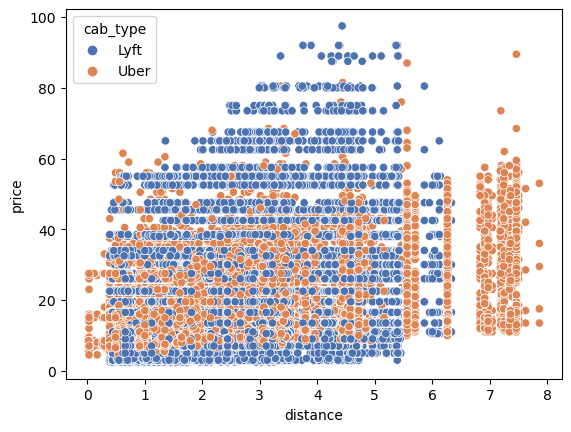

In [23]:
# Membuat plot dari price, distance dan cab_type
sns.scatterplot(data=df, x='distance',y='price', hue='cab_type', palette='deep');

- Pada gambar di atas dapat disimpulkan bahwa secara keseluruhan Lyft memiliki harga lebih mahal dari Uber. Jarak tempuh Uber lebih jauh dari Lyft dan semakin jauh semakin mahal harganya.

In [24]:
# Menyalin dataframe ke variabel nba
nba = df.copy()

In [25]:
nba.drop(columns=['id', 'timezone', 'product_id', 'long_summary', 'icon'], inplace=True)

In [26]:
nba.drop(columns=['day', 'month', 'datetime', 'windSpeed','timestamp', 'latitude', 'longitude', 'apparentTemperature', 'precipIntensity', 'precipProbability', 'humidity', 'windGust', 'windGustTime', 'visibility', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'precipIntensityMax', 'uvIndexTime', 'temperatureMin', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime'], inplace=True)

- Menghapus semua kolom yang tidak diperlukan dan memasukannya ke variabel baru

In [27]:
nba.head(2)

,hour,source,destination,cab_type,name,price,distance,surge_multiplier,temperature,short_summary
0,9,Haymarket Square,North Station,Lyft,Shared,5.0,0.44,1.0,42.34,Mostly Cloudy
1,2,Haymarket Square,North Station,Lyft,Lux,11.0,0.44,1.0,43.58,Rain


# Korelasi

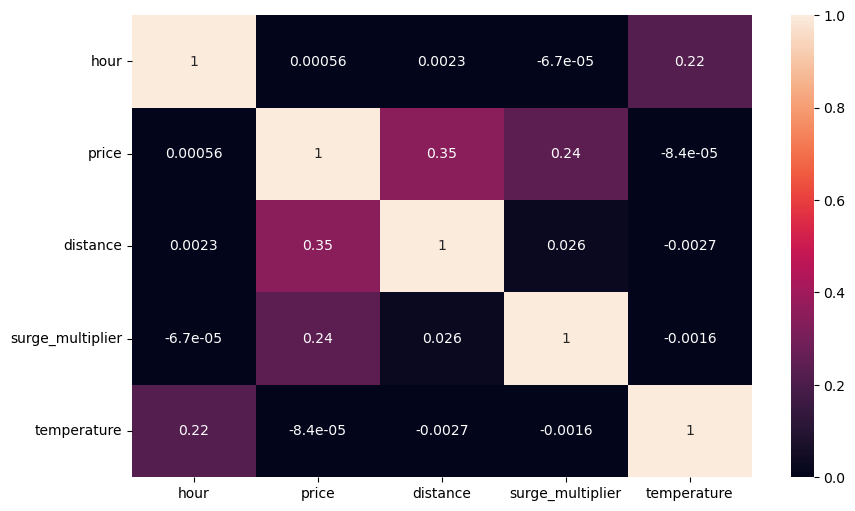

In [28]:
# Heatmap korelasi antara target dengan  fitur
corr = nba.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot= True, vmin=0, vmax=1)
plt.show()

In [29]:
nba.corr(numeric_only = True).nlargest(7, 'price')['price']

price               1.000000
distance            0.345061
surge_multiplier    0.240458
hour                0.000561
temperature        -0.000084
Name: price, dtype: float64

- Dari heatmap korelasi price di atas dapat dilihat bahwa distance dan surge_multiplier memiliki korelasi yang paling dekat hubungannya dengan price, sehingga kedua kolom tersebut dapat dijadikan sebagai fitur.

In [30]:
# Menyalin dataframe ke variabel df_encoder
df_encoder = df.copy()

In [31]:
# Mencari kolom yang bisa dijadikan fitur dari kolom kategori 
cat_col = ['price','source','destination','cab_type','name','short_summary'] 
df_encoder[cat_col].head(3)

,price,source,destination,cab_type,name,short_summary
0,5.0,Haymarket Square,North Station,Lyft,Shared,Mostly Cloudy
1,11.0,Haymarket Square,North Station,Lyft,Lux,Rain
2,7.0,Haymarket Square,North Station,Lyft,Lyft,Clear


In [32]:
# Mengganti kolom kategori menjadi numerik
lab = LabelEncoder()

df_encoder['source'] = lab.fit_transform(df_encoder['source'])
df_encoder['destination'] = lab.fit_transform(df_encoder['destination'])
df_encoder['cab_type'] = lab.fit_transform(df_encoder['cab_type'])
df_encoder['name'] = lab.fit_transform(df_encoder['name'])
df_encoder['short_summary'] = lab.fit_transform(df_encoder['short_summary'])

In [33]:
# Menampilkan encoder kolom categorikal
df_encoder[cat_col]

,price,source,destination,cab_type,name,short_summary
0,5.0,5,7,0,7,4
1,11.0,5,7,0,2,8
2,7.0,5,7,0,5,0
3,26.0,5,7,0,4,0
4,9.0,5,7,0,6,6
...,...,...,...,...,...,...
693065,9.5,11,6,1,11,6
693066,13.0,11,6,1,10,6
693067,9.5,11,6,1,9,6
693069,27.0,11,6,1,1,6


- Mengubah kolom kategorik menjadi kolom numerik dengan LabelEncoder

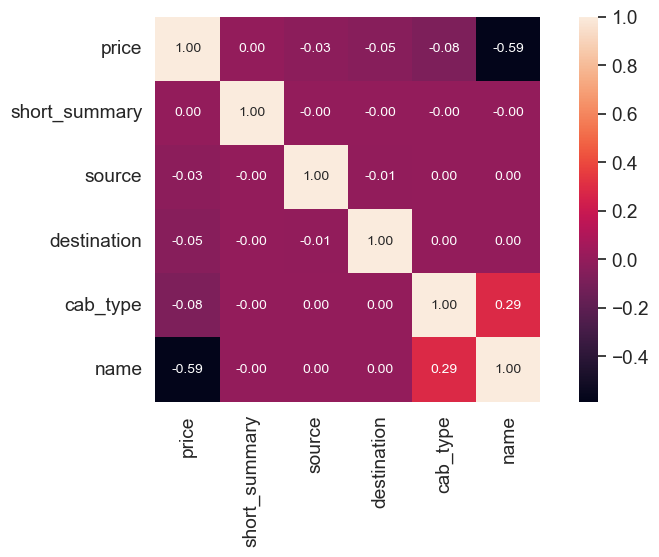

In [34]:
# Heatmap korelasi antara target dengan fitur
plt.figure(figsize=(10,5))
v = df_encoder[cat_col].corr(numeric_only=True).nlargest(6, 'price')['price'].index
i = np.corrcoef(df_encoder[v].values.T)
sns.set(font_scale=1.25)
rm = sns.heatmap(i, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=v.values, xticklabels=v.values)
plt.show()

In [35]:
df_encoder[cat_col].corr(numeric_only = True).nlargest(6, 'price')['price']

price            1.000000
short_summary    0.001245
source          -0.025366
destination     -0.046320
cab_type        -0.083385
name            -0.586644
Name: price, dtype: float64

- Pada gambar heatmap diatas dapat dilihat bahwa kolom name berkorelasi negatif dengan price

# V. Feature Engineering / Preprocessing

In [36]:
# Mengonversi kolom menjadi list dan disimpan pada variabel baru
ncol = df.describe().columns.tolist()
cacol = df.select_dtypes(include =['object']).columns.tolist()

In [37]:
# Numerical overview
df[ncol].describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,637976.0,1.544046e+09,689202.790112,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,637976.0,1.161853e+01,6.948776,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,637976.0,1.779767e+01,9.982083,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,637976.0,1.158655e+01,0.492452,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,637976.0,2.189261e+00,1.135413,2.000000e-02,1.270000e+00,2.160000e+00,2.930000e+00,7.860000e+00
surge_multiplier,637976.0,1.015068e+00,0.095422,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,637976.0,4.233816e+01,0.047856,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,637976.0,-7.106614e+01,0.020303,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,637976.0,3.958241e+01,6.725500,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


In [38]:
# Categorical overview
df[cacol].describe(include = 'object').T

,count,unique,top,freq
id,637976,637976,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1
timezone,637976,1,America/New_York,637976
source,637976,12,Financial District,54197
destination,637976,12,Financial District,54192
cab_type,637976,2,Uber,330568
product_id,637976,12,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,55096
name,637976,12,UberXL,55096
short_summary,637976,9,Overcast,201429
long_summary,637976,11,Mostly cloudy throughout the day.,186262
icon,637976,7,cloudy,201429


- Melihat data kolom kategorikal/object untuk dicek jumlah cardinalitynya
- Dari jumlah unique tidak terdapat cardinality yang terlalu tinggi kecuali pada kolom id yang nantinya tidak akan terpakai juga menjadi salah satu fitur

In [39]:
nba2 = df.iloc[:,[11,12,13,14]]
nba2.head()

,name,price,distance,surge_multiplier
0,Shared,5.0,0.44,1.0
1,Lux,11.0,0.44,1.0
2,Lyft,7.0,0.44,1.0
3,Lux Black XL,26.0,0.44,1.0
4,Lyft XL,9.0,0.44,1.0


Berdasarkan tabel di atas disimpulkan bahwa :
- Kolom name, distance, dan surge_multiplier akan dijadikan sebagai fitur, karena berdasarkan analisis pada EDA di atas ketiga kolom tersebut memiliki korelasi yang paling besar dari kolom-kolom yang lainnya.
- Kolom Price sebagai target


# Data Splitting

In [40]:
# Split Fitur dan Target
X = nba2.drop('price', axis=1)
y = nba2['price']

In [41]:
# Split Train dan Test
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f'train size: {X_train.shape}')
print(f'test size: {X_test.shape}')

train size: (510380, 3)
test size: (127596, 3)


In [42]:
# Get Numerical Columns and Categorical Columns
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns   : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns   :  ['distance', 'surge_multiplier']
Categorical Columns :  ['name']


In [43]:
# Calculating VIF (Multicollinearity)
def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif.sort_values(by=['VIF'],ascending=False)
    return(vif)

In [44]:
jk = nba2.iloc[:,[2,3]]
calc_vif(jk)

,variables,VIF
1,surge_multiplier,4.610678
0,distance,4.610678


- VIF = 4.61, tidak ada korelasi antara variabel independen dengan variabel lainnya

# Handling Outlier

In [45]:
# Membuat function untuk handling outlier
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=20)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

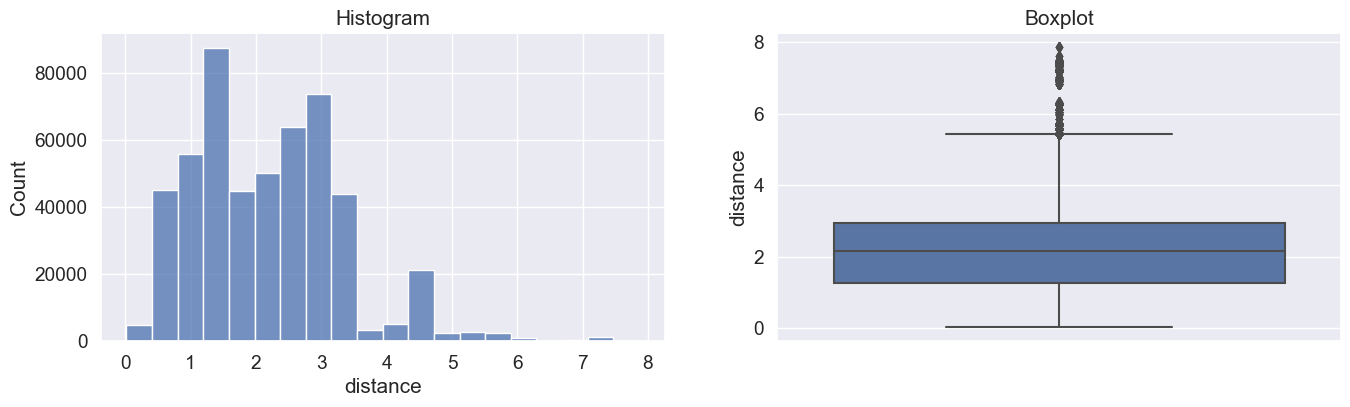


Skewness Value :  0.8180219737532629


In [46]:
# Cek skew dan outlier pada kolom distance dengan boxplot dan histogram
diagnostic_plots(X_train, 'distance')
print('\nSkewness Value : ', X_train['distance'].skew())

- Dari histogram di atas dapat dilihat bahwa distribusi pada distance/jarak terdistribusi tidak normal dimana terdapat skewness 0.8180219737532629 dan terlihat adanya right-end outliers pada boxplot

In [47]:
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

- Handling outliers dengan Tukey's Rule (IQR) karena data terdistribusi tidak normal

In [48]:
# Menghitung boundaries outliers
upper_boundary, lower_boundary = find_skewed_boundaries(X_train, 'distance', 1.5)
upper_boundary, lower_boundary

(5.42, -1.2200000000000002)

- Batas atas jarak outliers bernilai 5.42 km
- Jarak yang ditempuh oleh transportasi online hanya sedikit mencapai 5.42 km dan berdasarkan data yang sudah dilakukan analisis jarak terjauh adalah 7.86 km 
- Batas bawah bernilai negatif (-3.71). Karena jarak negatif tidak ada, maka untuk mencari outlier menggunakan batas atas saja.

In [49]:
print('Outliers upper_boundary (right end outliers) 5.42 : {}'.format(len(X_train[X_train['distance'] > upper_boundary])))
print ('')
print('Persentase right end outliers 5.42: {}'.format(len(X_train[X_train['distance'] > upper_boundary])*100/len(X_train)))


Outliers upper_boundary (right end outliers) 5.42 : 5331

Persentase right end outliers 5.42: 1.0445158509345978


- Handling outliers akan dilakukan dengan cara ditrimming karena persentase outliers tidak mencapai 5 %.

In [50]:
# Menampilkan index outliers pada kolom distance
X_train.query('distance > @upper_boundary').index

Int64Index([369921, 220812, 225752, 665169,  56518,  13621, 685080, 546454,
            166580, 564085,
            ...
            103071, 363153, 342063, 513714, 689207, 238901, 513925, 145298,
             53117, 294209],
           dtype='int64', length=5331)

- Index outliers yang terdapat pada kolom distance yang nantinya akan ditrimming (Length = 5331)

In [51]:
# Trimming outliers di X_train dan y_train
X_train_clear = X_train[~(X_train['distance']>5.42)]

outliers = X_train[(X_train['distance']>5.42)]
outliers.index

y_train_clear = y_train.drop(list(outliers.index),inplace=True)

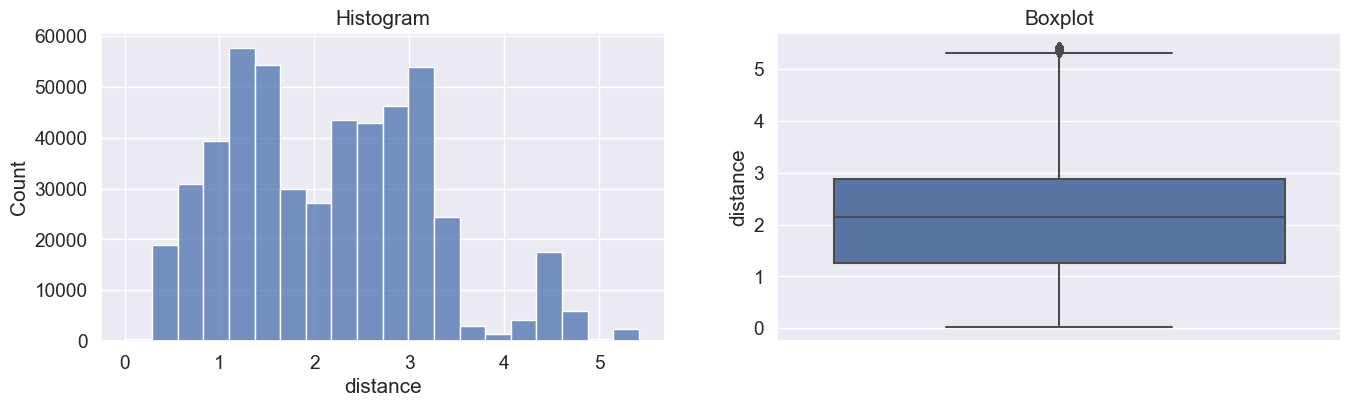


Skewness Value :  0.468471841411825


In [52]:
# Cek skew dan outlier pada kolom distance yang sudah ditrimming
diagnostic_plots(X_train_clear, 'distance')
print('\nSkewness Value : ', X_train_clear['distance'].skew())

- Setelah outliers dihandling nilai skew menjadi 0.468471841411825

In [69]:
# X train tanpa outliers
X_train_clear

,name,distance,surge_multiplier
141913,UberX,2.22,1.0
207434,Lux Black XL,3.22,1.0
524847,Black SUV,1.63,1.0
629294,Lux,0.61,1.0
5225,UberX,3.42,1.0
...,...,...,...
119762,Lux Black XL,3.46,1.0
281444,Lux Black XL,2.12,1.0
397249,UberX,1.11,1.0
143309,Shared,0.65,1.0


In [54]:
X_train.shape

(510380, 3)

- Setelah ditrimming outliersnya jumlah baris pada X_train menjadi berkurang dari 510380 menjadi 505049

# Encoding

In [55]:
cat_col = X_train_clear.iloc[:,[0,2]].copy()
num_col = X_train_clear.iloc[:,[1]].copy()

In [56]:
# Membuat instance dari OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# Melakukan one-hot encoding pada kolom name
cat_col_new = ohe.fit_transform(cat_col[['name']])
X_test_new = ohe.transform(X_test[['name']])

- One Hot Encoder yaitu teknik untuk mengubah data kategorik menjadi data numerik atau yang juga dikenal sebagai dummy variables. 
- Kolom name yang dtype object/kategorik diubah menjadi data numerik


In [57]:
# Membuat instance dari OrdinalEncoder
ord_enc = OrdinalEncoder()

# Melakukan ordinal encoding pada kolom surge_multiplier
cat_col_ord = ord_enc.fit_transform(cat_col[['surge_multiplier']])
X_test_ord = ord_enc.transform(X_test[['surge_multiplier']])

- Ordinal Encoder mengubah data kategorikal menjadi nilai integer berdasarkan urutan kategori yang ada. Ordinal Encoder lebih cocok digunakan pada data kategorikal yang memiliki urutan atau tingkat prioritas.
- Surge multiplier merupakan data kategorik yang memiliki urutan, sehingga diubah mengguankan Ordinal Encoder

# Scaling

In [78]:
# Scaling dengan StandardScaler
std_scaler = StandardScaler()

# Melakukan scaling pada kolom distance
num_col_std = std_scaler.fit_transform(num_col.values.reshape(-1, 1))    
X_test_std = std_scaler.transform(X_test[['distance']].values.reshape(-1, 1))

- Pada kolom distance(fitur) dilakukan scaling/normalisasi untuk mengubah nilai-nilai dari fitur tersebut ke dalam skala yang sama.
- Karena data sudah memiliki distribusi normal atau mendekati normal, maka menggunakan teknik Standard Scaler untuk menyamakan skala pada kolom distance.

In [59]:
# Concate Columns
X_train_final = np.concatenate([cat_col_new,cat_col_ord,num_col_std],axis=1)
X_test_final = np.concatenate([X_test_new,X_test_ord,X_test_std], axis=1)

# VI. Model Definition

In [60]:
# Train the Model
model_linreg = LinearRegression()
model_linreg.fit(X_train_final,y_train)

LinearRegression()

- Algoritma yang dipakai adalah Linear Regression.
- Model linear regression bekerja dengan baik pada data yang memiliki hubungan linier atau cukup dekat dengan hubungan linier antara variabel bebas dan variabel terikat. Dengan kata lain, jika ada hubungan linier yang kuat (dilihat dari hasil korelasinya) antara fitur dan target, maka model linear regression akan memberikan hasil yang akurat.
- Model linear Regression disini digunakan untuk mengetahui seberapa kuat hubungan antara 'price'(target) dengan fitur yang terpilih (name, distance, dan surge multiplier) atau seberapa besar pengaruh fitur tersebut dengan kenaikan harga transportasi online tersebut.

In [90]:
# Get Intercept and Slope

print('Intercept : ', model_linreg.intercept_)
print('Slope     : ', model_linreg.coef_)

Intercept :  -646762573.9919661
Slope     :  [6.46762594e+08 6.46762604e+08 6.46762591e+08 6.46762596e+08
 6.46762605e+08 6.46762583e+08 6.46762588e+08 6.46762580e+08
 6.46762583e+08 6.46762584e+08 6.46762590e+08 6.46762584e+08
 4.64025732e+00 3.02135250e+00]


- Nilai intercept = -646762573.9919661. Nilai intercept yang sangat besar dan negatif seperti -646762573.9919661 dalam konteks harga transportasi mungkin tidak memiliki makna, karena tidak mungkin ada harga transportasi negatif. Namun jika digunakan untuk memprediksi harga dengan menggunakan variabel-variabel tertentu, maka nilai intercept yang negatif besar menunjukkan adanya masalah dalam model tersebut.
- Nilai Slope positif menunjukkan bahwa semakin jauh jarak perjalanan, semakin mahal harga perjalanan ride-hailing, sedangkan slope yang memiliki nilai negatif menunjukkan kecenderungan sebaliknya.

# VII. Model Training

In [62]:
# Predict Train-Set and Test-Set
y_train_pred = model_linreg.predict(X_train_final)
y_test_pred = model_linreg.predict(X_test_final)

In [88]:
X_test.iloc[1]

name                WAV
distance            2.8
surge_multiplier    1.0
Name: 506474, dtype: object

In [87]:
# Nilai y test predic
y_test_pred[1]

11.621872782707214

- Prediksi error = 11.6

# VIII. Model Evaluation

In [83]:
# Model Evaluation
print("MAE Train:",mean_absolute_error(y_train,y_train_pred))
print("MAE Test:",mean_absolute_error(y_test,y_test_pred))
print("RMSE Train:",mean_squared_error(y_train,y_train_pred,squared=False))
print("RMSE Test:",mean_squared_error(y_test,y_test_pred,squared=False))
print("R2 Score Train:",r2_score(y_train,y_train_pred))
print("R2 Score Test:",r2_score(y_test,y_test_pred))
print('MAPE Train:', mean_absolute_percentage_error(y_train,y_train_pred))
print('MAPE Test:', mean_absolute_percentage_error(y_test,y_test_pred))

MAE Train: 1.7427898974192793
MAE Test: 1.7797816804976048
RMSE Train: 2.4424981701906567
RMSE Test: 2.513788119779872
R2 Score Train: 0.9299247950678162
R2 Score Test: 0.9275166313397681
MAPE Train: 0.13449365050869355
MAPE Test: 0.13593051069188167


- RMSE dihubungkan dengan outliers. Berdasarkan hasil diatas dapat disimpulkan bahwa nilai selisih MAE train dengan RMSE train cukup besar, hal tersebut menandakan bahwa masih terdapat banyak outliers pada data.
- MAPE adalah persentase error dari prediksi kita. Besar nilai error pada data prediksi test kita adalah 1.16, hasil tersebut didapatkan dari y test prediksi asli dikalikan dengan hasil persentase dari MAPE test.
- R2 Score merepresentasikan seberapa besar variabel/fitur yang kita pilih mempengaruhi target. Jadi pada kasus ini bisa disimpulkan bahwa variabel/fitur yang dipilih (3 fitur yang dipilih yaitu name/jenis transportasi, distance/jarak, surge multiplier/pengali kenaikan) mempengaruhi harga transportasi online(price). Nilai R2 score = 0.92, yang berarti bahwa 92 % fitur yang dipilih berpengaruh pada nilai target.

In [66]:
# Mencari nilai selisih antara MAE train dan test
a = mean_absolute_error(y_train,y_train_pred) 
b = mean_absolute_error(y_test,y_test_pred)

selisih_mae = a - b
selisih_mae

-0.03699178307832551

- Metrics yang akan dipakai adalah Mean Absolute Error (MAE). Karena MAE mudah dipahami untuk mengevaluasi kinerja model. MAE menghitung rata-rata dari selisih absolut antara nilai aktual dan nilai prediksi, sehingga memberikan gambaran tentang seberapa dekat prediksi model dengan nilai aktualnya.
- Berdasarkan nilai selisih antara MAE Train dan MAE Test tersebut, model dapat digolongkan sebagai good fit atau model yang memiliki kinerja yang baik.

In [82]:
nba2.price.mean()

16.545125490614065

- Rata-rata 'y' price = 16.54. Jika dibandingkan dengan rata-rata MAE sangat jauh perbedaannya maka prediksi untuk model yang kita buat sudah bagus.

# IX. Model Saving

In [67]:
# Save the file
with open('model_linreg.pkl','wb') as file_1:
  joblib.dump(model_linreg, file_1)

with open('model_std_scaler.pkl','wb') as file_2:
  joblib.dump(std_scaler, file_2)

with open('model_ohe_encoder.pkl','wb') as file_3:
  joblib.dump(ohe, file_3)

with open('model_ord_encoder.pkl','wb') as file_4:
  joblib.dump(ord_enc,file_4)

# X. Kesimpulan

- Berdasarkan analisis yang sudah dilakukan dari dataset rideshare dimana disini kita akan menentukan/memprediksi fitur apa yang mempengaruhi kenaikan harga perjalanan pada platform ride-hailing. Dan price/harga perjalanan disini ditentukan sebagai target dan untuk fitur yang memiliki hubungan dengan price awalnya saya memilih hour, source, destination, distance, short summary, temperature, surge multiplier, name, cab type dan windspeed tetapi setelah dilakukan eksplorasi data dan dicari hubungan/korelasi dari semua fitur yang ditentukan di awal  hanya 3 fitur yang memiliki hubungan/berkorelasi tinggi dengan price yaitu distance/jarak tempuh dari lokasi ke tujuan, surge multiplier/biaya perjalanan yang akan dikalikan berlipat sesusai dengan jumlah pengalinya dan terakhir, dan name/jenis kendaraannya tetapi name sendiri memiliki nilai korelasi negatif dengan price, walaupun begitu saya tetap memakainya karena negatif belum tentu tidak ada hubungan antara name dengan price. 
- Setelah dilakukan permodelan menggunakan Linear Regression mencari hubungan linier antara fitur yang dipilih dengan target menggunakan beberapa matrik salah satunya MAE (mean absolute error) diperoleh hasil rata-rata nilai selisih antara MAE train dan MAE test tidak terlalu jauh nilai selisihnya yang berarti bahwa model yang dibuat good fit. Good fit mengindikasikan bahwa model regresi yang dibuat berhasil merepresentasikan hubungan antara variabel independen (fitur) dan variabel dependen (target) dengan baik. Dalam arti lain, model tersebut dapat digunakan untuk memprediksi nilai variabel dependen berdasarkan nilai variabel independen dengan tingkat akurasi yang tinggi. Jadi ketiga fitur tersebut dapat digunakan untuk memprediksi harga perjalanan berdasarkan jarak/distance, jenis transportasi/name, dan surge multiplier/biaya yang dikalikan dengan tingkat akurasi yang tinggi. 
- Namun berdasarkan hasil intercept yang bernilai besar negatif mengartikan bahwa adanya masalah dalam model, kemungkinan adanya faktor lain yang mempengaruhi price, seperti waktu tempuh, musim, atau permintaan, yang perlu dipertimbangkan dalam analisis lebih lanjut. 

# Conceptual Problems

Jawab pertanyaan berikut:

1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !
- Jawaban : Linear regression adalah salah satu teknik analisis regresi yang digunakan untuk memodelkan hubungan antara satu atau lebih variabel independen ("x") dan variabel dependen ("y") dengan persamaan garis lurus atau linear. Ada beberapa asumsi yang harus dipenuhi agar model regresi linear dapat dianggap valid dan akurat. Beberapa asumsi penting yang harus dipenuhi oleh model regresi linear adalah sebagai berikut:
- a. linear relationship : mengasumsikan bahwa hubungan antara variabel 'x' dan 'y''bersifat linear atau berbentuk garis lurus.
- b. Little or no multicollinearity : mengasumsikan bahwa setiap pengamatan atau data yang digunakan dalam model regresi bersifat independen satu sama lainnya. Dengan kata lain, tidak ada ketergantungan atau hubungan antara satu data dan data lainnya (x itu harus independent terhadap x yang lain)(x terhadap y harus dependent)
- c. Multi-variate normality : mengasumsikan bahwa nilai kesalahan prediksi mengikuti distribusi normal
- d. Little or no autocorrelation among residues : menggunakan kesalahan atau residu untuk mengukur perbedaan antara nilai aktual dan nilai prediksi dari variabel dependen. Dan mengasumsikan bahwa tidak ada atau hanya sedikit autocorrelation antara nilai-nilai kesalahan dalam model regresi linear.
- e. Homoscedasticity of the errors. error should be random to all your predicted values : varian dari kesalahan atau residu model regresi linear adalah konstan dan tidak bergantung pada nilai prediktor. Data harus homo agar errornya tidak tinggi

2. Tunjukkan dan tafsirkan arti dari intercept dan slope yang didapat dari model yang telah Anda bangun !
- Jawaban : Dalam model regresi linear, intercept dan slope merupakan parameter penting yang digunakan untuk memperkirakan hubungan antara variabel independen (x) dan variabel dependen (y). 
- Nilai intercept = -646762573.9919661. Nilai intercept yang sangat besar dan negatif seperti -646762573.9919661 dalam konteks harga transportasi mungkin tidak memiliki makna, karena tidak mungkin ada harga transportasi negatif. Namun jika digunakan untuk memprediksi harga dengan menggunakan variabel-variabel tertentu, maka nilai intercept yang negatif besar menunjukkan adanya masalah dalam model tersebut. Nilai intercept yang sangat besar dan negatif bisa terjadi jika data yang digunakan dalam model tidak benar atau tidak representatif, atau jika variabel-variabel yang digunakan tidak tepat dalam menjelaskan hubungan antara target dan faktor-faktor lain yang mempengaruhi target.
- Terdapat 14 nilai slope yang masing-masing mengindikasikan pengaruh variabel independen (fitur) pada harga perjalanan ride-hailing. 
Slope yang memiliki nilai positif menunjukkan bahwa ketika variabel independen meningkat, harga perjalanan ride-hailing juga cenderung meningkat. Sebagai contoh, kita menggunakan jarak tempuh (distance) sebagai variabel independen, maka slope positif menunjukkan bahwa semakin jauh jarak perjalanan, semakin mahal harga perjalanan ride-hailing, sedangkan slope yang memiliki nilai negatif menunjukkan kecenderungan sebaliknya.